Estudio de la cartera de clientes de la compañía Telco NN mediante Machine Learning

Autor: Rahimi Vilchez, Aiad

In [1]:
# Se importan las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import warnings; warnings.filterwarnings('ignore')

In [2]:
# Llamo al dataset
dataset = pd.read_csv("telco_churn_clusterai.csv")

In [3]:
# Visualizamos si se subió el dataset
dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [4]:
filas_0 = dataset.shape[0]
columnas_0 = dataset.shape[1]
print(f"El dataset tiene {filas_0} muestras y {columnas_0} dimensiones")

El dataset tiene 7043 muestras y 22 dimensiones


In [5]:
# Información general de dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            6127 non-null   object 
 3   SeniorCitizen     6127 non-null   float64
 4   Partner           6127 non-null   object 
 5   Dependents        6127 non-null   object 
 6   tenure            6127 non-null   float64
 7   PhoneService      6127 non-null   object 
 8   MultipleLines     6127 non-null   object 
 9   InternetService   6127 non-null   object 
 10  OnlineSecurity    6127 non-null   object 
 11  OnlineBackup      6127 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          5846 non-null   object 


Limpieza de datos

- Nans
- Duplicados
- Símbolos

In [6]:
# Verificamos si hay nulos en cada columna
dataset.isnull().any()

Unnamed: 0          False
customerID          False
gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges       True
TotalCharges        False
Churn               False
dtype: bool

In [7]:
# Total de nulos por columna
total_nulls = dataset.isnull().sum()
total_nulls

Unnamed: 0             0
customerID             0
gender               916
SeniorCitizen        916
Partner              916
Dependents           916
tenure               916
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges      1197
TotalCharges           0
Churn                  0
dtype: int64

In [8]:
# Porcentaje de nulos por columna
percent_nulls = dataset.isnull().sum()/len(dataset) *100
percent_nulls

Unnamed: 0           0.000000
customerID           0.000000
gender              13.005821
SeniorCitizen       13.005821
Partner             13.005821
Dependents          13.005821
tenure              13.005821
PhoneService        13.005821
MultipleLines       13.005821
InternetService     13.005821
OnlineSecurity      13.005821
OnlineBackup        13.005821
DeviceProtection     0.000000
TechSupport          0.000000
StreamingTV          0.000000
StreamingMovies      0.000000
Contract            16.995598
PaperlessBilling    16.995598
PaymentMethod       16.995598
MonthlyCharges      16.995598
TotalCharges         0.000000
Churn                0.000000
dtype: float64

In [7]:
# No hay símbolos o datos extraños
for i in range(dataset.shape[1]):
    column = dataset.columns[i]
    datos_column = dataset[f"{column}"].unique()
    print(datos_column)

[   0    1    2 ... 7040 7041 7042]
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male' nan]
[nan  0.  1.]
['Yes' 'No' nan]
['No' nan 'Yes']
[ 1. 34.  2. nan  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 47. 72. 17. 27.  5. 46. 11. 70. 43. 60. 18. 63. 66.  9.  3. 31. 50. 64.
 56. 30. 45.  7. 42. 35. 48. 29. 12. 38. 32. 55. 37. 36. 41.  6.  4. 33.
 23. 57. 61. 65. 20. 53. 14. 15. 40. 59. 24. 44. 19. 54. 51. 67. 68. 26.
  0. 39.]
['No' 'Yes' nan]
['No phone service' 'No' nan 'Yes']
['DSL' nan 'Fiber optic' 'No']
['No' 'Yes' nan 'No internet service']
['Yes' 'No' nan 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' nan 'Two year']
[nan 'No' 'Yes']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]
[29.85   nan 53.85 ... 63.1  44.2  78.7 ]
['29.8

In [8]:
# Eliminamos las dimensiones que no son relevantes
dataset = dataset.drop(["Unnamed: 0", "customerID","Contract", "PaperlessBilling","PaymentMethod",
                        "MonthlyCharges", "OnlineBackup", "InternetService"], axis = 1)

In [9]:
# Eliminamos las filas que no tengan como mínimo 12 (dataset.shape[1] (14) - 2) datos válidos en c/ fila
thresh = (dataset.shape[1] - 2) # Cantidad de valores mínimos de datos válidos presentes en una fila (non-Nan)
dataset = dataset.dropna(axis = "rows", how = None, thresh = thresh)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6535 entries, 0 to 7041
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5822 non-null   object 
 1   SeniorCitizen     5808 non-null   float64
 2   Partner           5835 non-null   object 
 3   Dependents        5832 non-null   object 
 4   tenure            5811 non-null   float64
 5   PhoneService      5830 non-null   object 
 6   MultipleLines     5827 non-null   object 
 7   OnlineSecurity    5825 non-null   object 
 8   DeviceProtection  6535 non-null   object 
 9   TechSupport       6535 non-null   object 
 10  StreamingTV       6535 non-null   object 
 11  StreamingMovies   6535 non-null   object 
 12  TotalCharges      6535 non-null   object 
 13  Churn             6535 non-null   object 
dtypes: float64(2), object(12)
memory usage: 765.8+ KB


In [11]:
percent_nulls = dataset.isnull().sum()/len(dataset) *100
percent_nulls

gender              10.910482
SeniorCitizen       11.124713
Partner             10.711553
Dependents          10.757460
tenure              11.078806
PhoneService        10.788064
MultipleLines       10.833971
OnlineSecurity      10.864575
DeviceProtection     0.000000
TechSupport          0.000000
StreamingTV          0.000000
StreamingMovies      0.000000
TotalCharges         0.000000
Churn                0.000000
dtype: float64

In [12]:
# Reemplazamos los valores string por valores dummies
dataset2 = dataset.replace({"No" : 0, "No " : 0, "Yes" : 1, "No phone service": 0, "No internet service": 0,
                            "Female" : 0, "Male": 1})

In [13]:
# Visualizamos los diferentes datos de cada columna
for i in range(dataset2.shape[1]):
    column = dataset2.columns[i]
    datos_column = dataset2[f"{column}"].unique()
    print(datos_column)

[ 0.  1. nan]
[nan  0.  1.]
[ 1.  0. nan]
[ 0.  1. nan]
[ 1. 34.  2. nan  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 47. 72. 27.  5. 46. 11. 70. 17. 43. 60. 18. 63. 66.  9.  3. 31. 50. 64.
 56. 30. 45.  7. 42. 35. 48. 29. 12. 38. 32. 55. 37. 36. 41.  6.  4. 23.
 57. 61. 65. 20. 53. 15. 33. 40. 59. 24. 44. 19. 54. 51. 67. 14. 68. 26.
  0. 39.]
[ 0.  1. nan]
[ 0. nan  1.]
[ 0.  1. nan]
[0 1]
[0 1]
[0 1]
[0 1]
['29.85' '1889.5' '108.15' ... '7362.9' '346.45' '306.6']
[0 1]


In [14]:
# Eliminamos los Nan restantes
dataset2 = dataset2.dropna()
dataset2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TotalCharges,Churn
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,1,0,0,0,1889.5,0
5,0.0,0.0,0.0,0.0,8.0,1.0,1.0,0.0,1,0,1,1,820.5,1
10,1.0,0.0,1.0,1.0,13.0,1.0,0.0,1.0,0,0,0,0,587.45,0
13,1.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0,1,0,1,1,5036.3,1
18,0.0,0.0,1.0,1.0,10.0,1.0,0.0,0.0,1,1,0,0,528.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0,0,0,0,2625.25,0
7035,1.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,0,0,1,0,1495.1,0
7036,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1,1,1,1,743.3,0
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1,0,1,1,7362.9,0


In [17]:
# Verificamos que no hayan Nans
percent_nulls = dataset2.isnull().sum()/len(dataset2) *100
percent_nulls

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
OnlineSecurity      0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Análisis exploratorio de datos

- Heatmap
- Historiograma

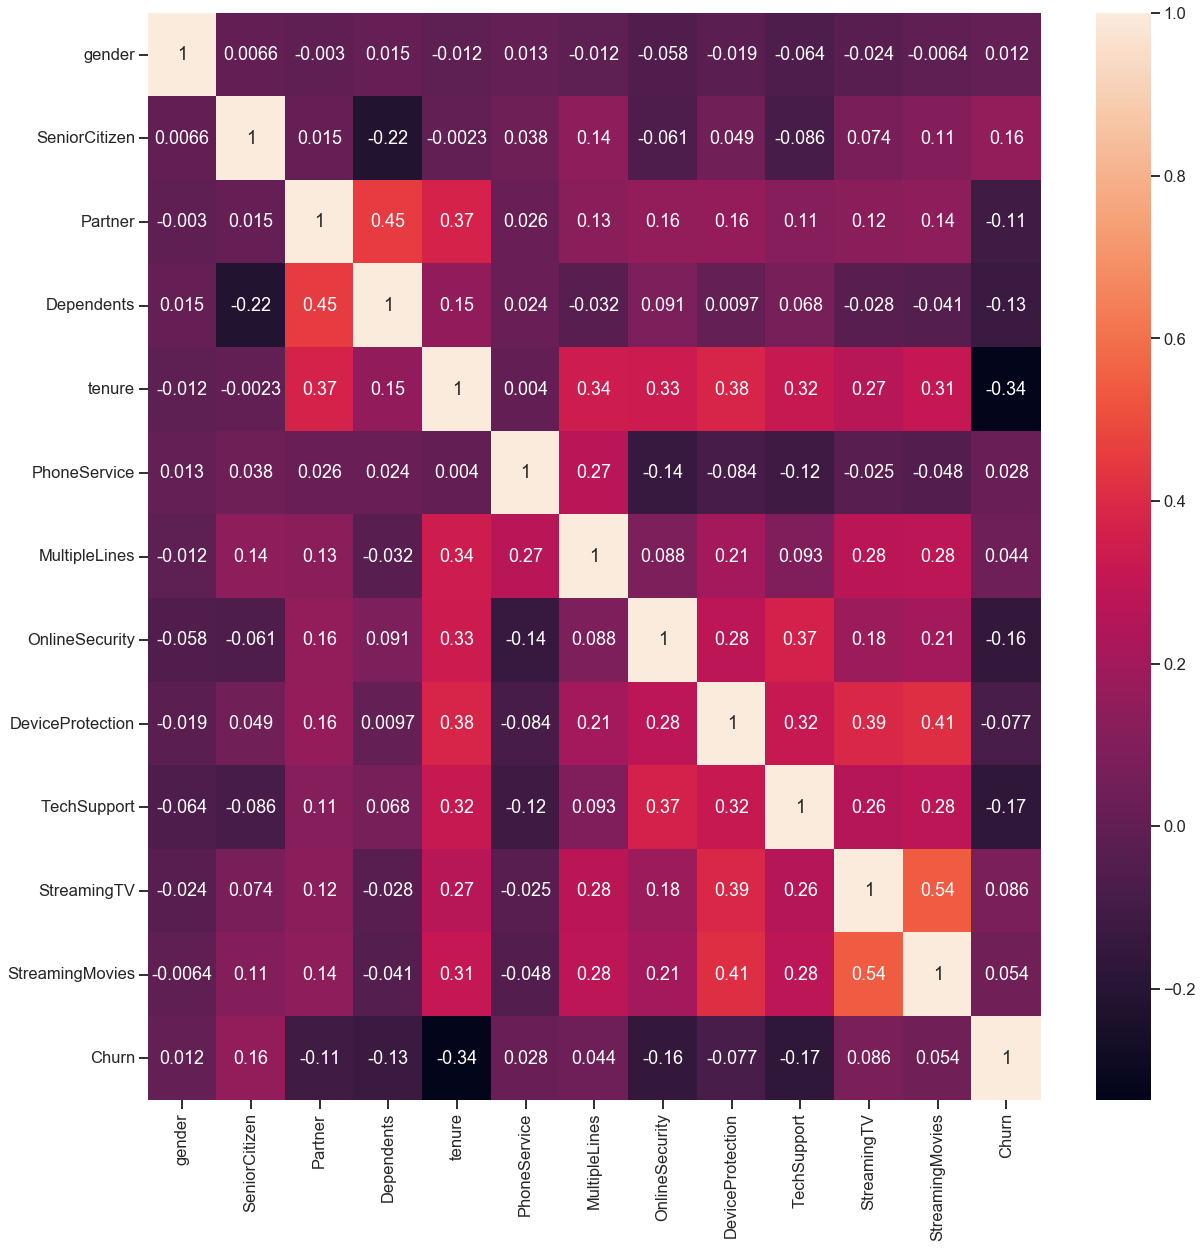

In [39]:
# Heatmap
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(dataset2.corr(),annot=True)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

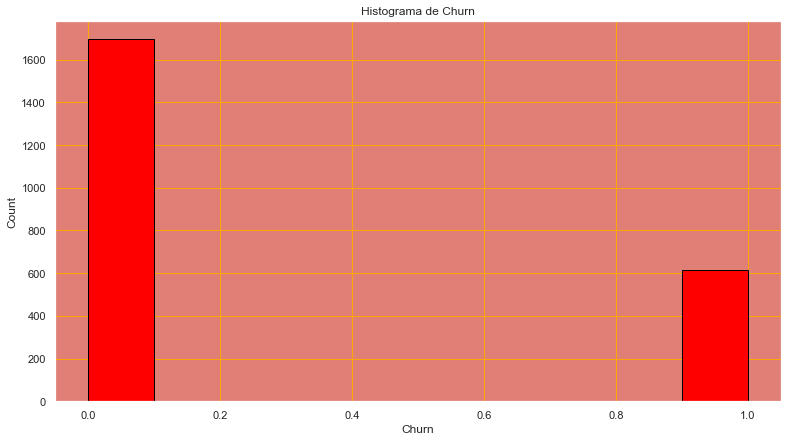

In [19]:
# Historiograma
plt.figure(figsize=(13,7))
plt.style.use('seaborn-deep')
plt.rcParams['axes.facecolor'] = '#e07f75'
plt.grid(color='orange',linestyle='solid')
plt.title(f'Histograma de Churn')
plt.ylabel('Count')
plt.xlabel('Churn')
plt.hist(dataset2.Churn,bins=10,density=False,edgecolor='black',color='red')
plt.show()

In [20]:
#Definimos x e y
x = dataset2.loc[:,['tenure', 'TechSupport','SeniorCitizen','OnlineSecurity']]
y = dataset2.loc[:,['Churn']]

In [21]:
# Vemos como queda x
x

,tenure,TechSupport,SeniorCitizen,OnlineSecurity
1,34.0,0,0.0,1.0
5,8.0,0,0.0,0.0
10,13.0,0,0.0,1.0
13,49.0,0,0.0,0.0
18,10.0,1,0.0,0.0
...,...,...,...,...
7033,38.0,0,0.0,0.0
7035,19.0,0,0.0,0.0
7036,12.0,1,0.0,0.0
7039,72.0,0,0.0,0.0


In [22]:
# Visualizamos y
y

,Churn
1,0
5,1
10,0
13,1
18,1
...,...
7033,0
7035,0
7036,0
7039,0


In [23]:
# Elegimos un 25% para los datos de testeo
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=15)

In [24]:
# Normalizamos los datos para facilitar el análisis en los modelos de aprendizaje
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Logistic Regression

In [25]:
# Creamos el modelo de regresion logistica y usamos Cross Validation para ver cual hiperparametro ajusta mejor
param_lr = {'C':[1, 10, 100,1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}
lr = LogisticRegression()
clf_lr = GridSearchCV(lr, param_grid = param_lr , scoring= 'accuracy', refit = True, cv = 3)
clf_lr.fit(X_train_norm, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [26]:
# Guardamos los resultados Logistic Regression
scores = clf_lr.cv_results_

In [27]:
print("Los mejores parametros son %s con un score de %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))

Los mejores parametros son {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} con un score de 0.74


In [36]:
# Predecimos los valores a partir de las x de testeo
ypred0 = clf_lr.predict(X_test_norm)

In [37]:
# Computamos el accuracy, comparando y_test vs ypred
test_acc0 = accuracy_score(y_test, ypred0)
print("El accuracy es " + str(test_acc0))

El accuracy es 0.7647058823529411


SVM

In [28]:
#Creamos el modelo Support Vector Classification (SVC)
param_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100], 'gamma':[0.01, 0.1,1]}

In [29]:
svc = svm.SVC()

In [30]:
#Usamos Cross Validation para ver cual hiperparametro ajusta mejor
clf_svm = GridSearchCV(svc, param_grid = param_svc, refit = True, cv = 3)

In [31]:
clf_svm.fit(X_train_norm, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
#Guardamos los resultados del SVM
scores = clf_svm.cv_results_

In [33]:
print("Los mejores parametros son %s con un score de %0.2f" % (clf_svm.best_params_, clf_svm.best_score_))

Los mejores parametros son {'C': 10, 'gamma': 1, 'kernel': 'rbf'} con un score de 0.74


In [34]:
# Predecimos los valores a partir de las x de testeo
ypred1 = clf_svm.predict(X_test_norm)

In [35]:
# Computamos el accuracy, comparando y_test vs ypred
test_acc1 = accuracy_score(y_test, ypred1)
print("El accuracy es " + str(test_acc1))

El accuracy es 0.7750865051903114


Evaluación de modelos

In [41]:
if test_acc0 > test_acc1:
    print(f"El modelo Logistic Regression tuvo un mejor desempeño con respeto al modelo SMV, con un accuracy de {test_acc0}")
else:
    print(f"El modelo SMV tuvo un mejor desempeño con respeto al modelo Logistic Regression, con un accuracy de {test_acc1}")


El modelo SMV tuvo un mejor desempeño con respeto al modelo Logistic Regression, con un accuracy de 0.7750865051903114


El accuracy no fue el esperado. Esto se puede deber a la eliminación de filas y variables que se aplicó en el dataset, el error intrínseco del modelo y la falta de correlación entre las variables en juego.